### Analysis Overview

Employees play an important role in a business. Their personal development will have an impact on work productivity and, of course, the company's development.

It is hoped that this employee satisfaction data will help management monitor each employee's development and make decisions in order to create a good environment for employee development and satisfaction.

#### Import Package

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [92]:
sns.set() 

In [93]:
import warnings
warnings.filterwarnings('ignore')

In [94]:
df = pd.read_csv("satisfaction.csv")

In [95]:
df.head()

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1


#### Column Description

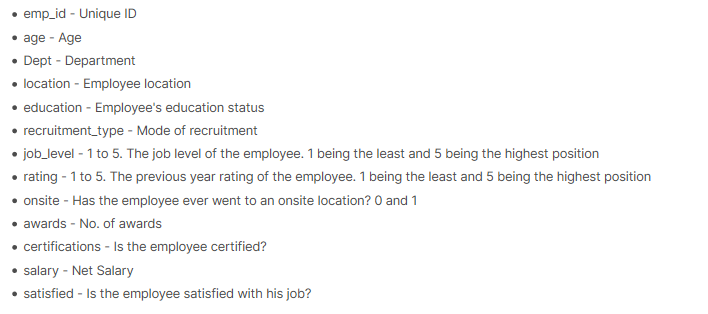

In [96]:
df.shape

(500, 14)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        500 non-null    int64 
 1   emp_id            500 non-null    object
 2   age               500 non-null    int64 
 3   Dept              500 non-null    object
 4   location          500 non-null    object
 5   education         500 non-null    object
 6   recruitment_type  500 non-null    object
 7   job_level         500 non-null    int64 
 8   rating            500 non-null    int64 
 9   onsite            500 non-null    int64 
 10  awards            500 non-null    int64 
 11  certifications    500 non-null    int64 
 12  salary            500 non-null    int64 
 13  satisfied         500 non-null    int64 
dtypes: int64(9), object(5)
memory usage: 45.0+ KB


#### Missing Value

In [98]:
df.isnull().sum()

Unnamed: 0          0
emp_id              0
age                 0
Dept                0
location            0
education           0
recruitment_type    0
job_level           0
rating              0
onsite              0
awards              0
certifications      0
salary              0
satisfied           0
dtype: int64

There is no missing value in the data

#### Outlier

In [99]:
num = ["age", "salary"]
df[num].head()

,age,salary
0,28,86750
1,50,42419
2,43,65715
3,44,29805
4,33,29805


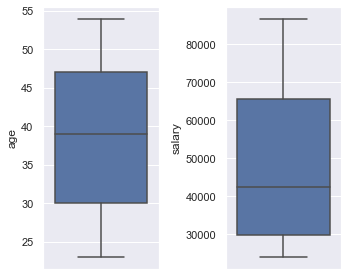

In [100]:
plt.figure(figsize = (5, 4))
for i in range(0, len(num)):
    plt.subplot(1, 2, i+1)
    sns.boxplot(y = df[num[i]])
    plt.tight_layout()

There are no outliers in the data

#### Drop columns and duplicate data

Unnamed column will be removed because it is not used in analysis

In [101]:
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [102]:
df[df.duplicated()]

,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied


In [103]:
print(df.duplicated().value_counts())

False    500
dtype: int64


#### Basic Statistical Analysis

In [104]:
df.describe()

,age,job_level,rating,onsite,awards,certifications,salary,satisfied
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,38.610000,3.032000,3.072000,0.466000,4.538000,0.496000,50416.056000,0.526000
std,9.438648,1.423738,1.425089,0.499342,2.853215,0.500485,23671.392661,0.499824
min,23.000000,1.000000,1.000000,0.000000,0.000000,0.000000,24076.000000,0.000000
25%,30.000000,2.000000,2.000000,0.000000,2.000000,0.000000,29805.000000,0.000000
50%,39.000000,3.000000,3.000000,0.000000,5.000000,0.000000,42419.000000,1.000000
75%,47.000000,4.000000,4.000000,1.000000,7.000000,1.000000,65715.000000,1.000000
max,54.000000,5.000000,5.000000,1.000000,9.000000,1.000000,86750.000000,1.000000


In [105]:
df.describe(include = "O")

,emp_id,Dept,location,education,recruitment_type
count,500,500,500,500,500
unique,499,5,2,2,4
top,MKT7287,Purchasing,City,PG,On-Campus
freq,2,109,259,254,133


### Basic Data Analysis

In [106]:
cond_satisfaction = [df["satisfied"] == 1]

value = ["YES"]

df["satisfied?"] = np.select(cond_satisfaction, value, default = "NO")

In [107]:
df.head()

,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied,satisfied?
0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1,YES
1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0,NO
2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0,NO
3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1,YES
4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1,YES


In [108]:
satisfied_perc = df["satisfied?"].value_counts(normalize = True)*100
satisfied_perc

YES    52.6
NO     47.4
Name: satisfied?, dtype: float64

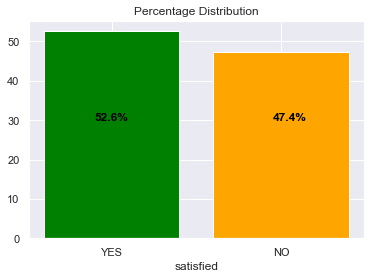

In [109]:
xo = satisfied_perc.index
yo = satisfied_perc.values
plt.figure(figsize=(6,4))
plt.bar(xo, yo,
        color=["green","orange"])

plt.xlabel("satisfied")
plt.title("Percentage Distribution")
plt.text(0.95, 30, "47.4%", color="black",fontweight="bold")
plt.text(-0.1, 30, "52.6%", color="black",fontweight="bold")

plt.show()

According to the above distribution, the company's employee satisfaction index only reached 52.6 percent. This means that nearly half of the employees are dissatisfied with their jobs.

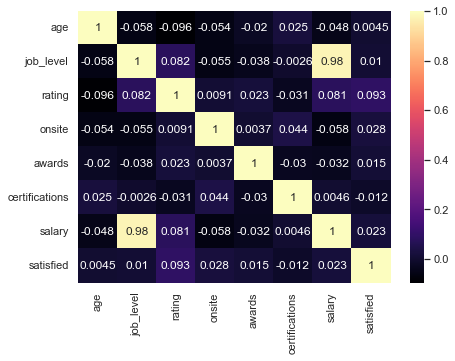

In [110]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True, cmap='magma');

Salary and job level have a strong relationship.

In [111]:
satisfied_0 = df[df["satisfied"] == 0]
satisfied_0.head()

,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied,satisfied?
1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0,NO
2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0,NO
6,PUR1466,26,Purchasing,Suburb,UG,Referral,5,5,0,2,0,86750,0,NO
7,TECH5426,25,Technology,City,UG,Recruitment Agency,1,1,0,4,0,24076,0,NO
9,TECH9322,45,Technology,City,PG,Referral,3,3,0,9,0,42419,0,NO


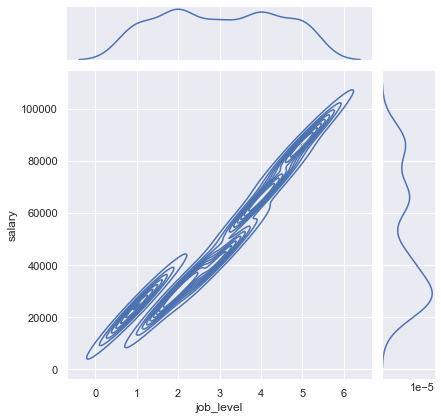

In [112]:
sns.jointplot(x = "job_level", y = "salary", data = satisfied_0, kind = "kde");

According to the data, entry-level employees who earn less than 40,000 are the most dissatisfied.

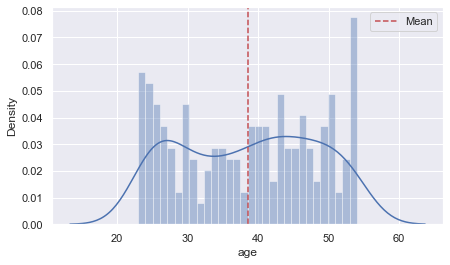

In [113]:
plt.figure(figsize = (7, 4))

sns.distplot(satisfied_0["age"], bins = 30)
plt.axvline(satisfied_0["age"].mean(),
           label = "Mean",
            ls = "--",
           color = "r")
plt.grid(True)
plt.legend()
plt.show()

In [114]:
age_mean_0 = satisfied_0["age"].mean()
age_mean_0

38.565400843881854

In [115]:
uns_40 = satisfied_0[satisfied_0["age"] > 40]
uns_40.head(10)

,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied,satisfied?
1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0,NO
2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0,NO
9,TECH9322,45,Technology,City,PG,Referral,3,3,0,9,0,42419,0,NO
25,SAL3747,53,Sales,Suburb,PG,Recruitment Agency,4,5,0,8,1,65715,0,NO
30,TECH2899,54,Technology,City,UG,On-Campus,1,5,1,2,1,24076,0,NO
36,TECH9838,50,Technology,Suburb,UG,Walk-in,2,2,1,6,1,29805,0,NO
38,TECH9792,46,Technology,City,UG,Referral,2,5,0,2,0,29805,0,NO
42,HR8041,50,HR,City,PG,Referral,3,2,1,6,0,42419,0,NO
47,HR9226,46,HR,Suburb,UG,Referral,3,2,0,1,0,42419,0,NO
51,HR8555,42,HR,Suburb,UG,Referral,1,1,1,5,0,24076,0,NO


In [116]:
uns_40.shape

(109, 14)

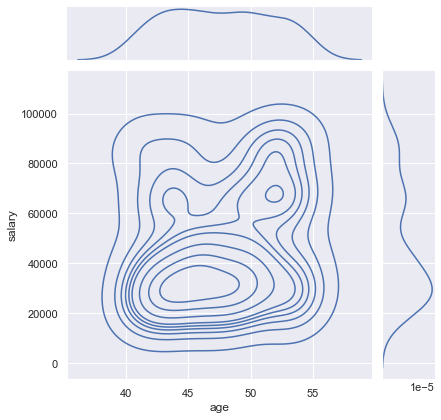

In [117]:
sns.jointplot(x = "age", y = "salary", data = uns_40, kind = "kde");

Many employees over the age of 40 continue to earn less than 40,000.

In [124]:
uns_sal = uns_40[uns_40["salary"] > 60000]
uns_sal.head()

,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied,satisfied?
2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0,NO
25,SAL3747,53,Sales,Suburb,PG,Recruitment Agency,4,5,0,8,1,65715,0,NO
63,SAL8869,52,Sales,Suburb,PG,Walk-in,5,4,0,1,1,86750,0,NO
92,SAL7278,48,Sales,Suburb,UG,On-Campus,4,3,0,2,0,65715,0,NO
95,HR8215,44,HR,Suburb,UG,Recruitment Agency,4,4,1,5,1,65715,0,NO


In [119]:
pd.crosstab(index = uns_sal["location"], columns = "Total")

col_0,Total
location,
City,14
Suburb,25


Those over 40 who have a salary of more than $60,000 but are dissatisfied, most likely because they live in a suburban area.

In [120]:
dept = pd.crosstab(index = satisfied_0["Dept"], columns = "Total").sort_values("Total", ascending = False)

In [121]:
dept1 = dept.reset_index()

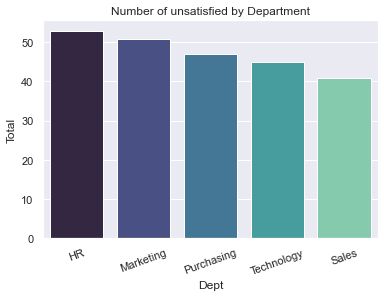

In [122]:
plt.figure(figsize = (6,4))
sns.barplot(x = "Dept",
           y = "Total",
           data = dept1,
           palette = "mako")
plt.xticks(rotation = 20)
plt.title("Number of unsatisfied by Department");

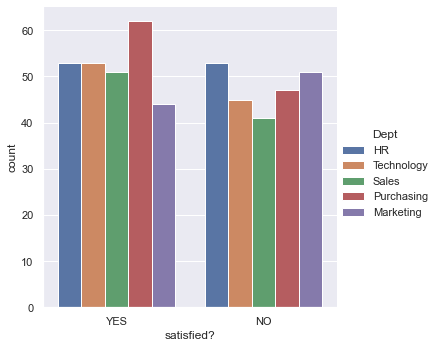

In [123]:
sns.catplot(x = "satisfied?",
           hue = "Dept",
           kind = "count",
           data = df)
plt.show()

There are an equal number of satisfied and dissatisfied employees in the HR department. Surprisingly, there are more dissatisfied employees in the marketing department.